# Курсовая работа

# 1. Метод наименьших квадратов

Для аппроксимации исходных данных при помощи метода наименьших квадратов сначала нам нужно выгрузить данные из Exel-файла. Для этого импортируем библиотеку pandas и выполним следуюшие действия:

In [51]:
import pandas as pd
data = pd.read_excel('https://github.com/antonnpopov/2023/raw/main/210_1.xlsx', sheet_name = 'Попов')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(data.head(32))

       x      y
0      0  11.30
1     10  11.25
2     20  11.18
3     25  11.10
4     30  10.88
5     50   9.88
6     74   9.40
7     75   9.39
8     99   9.10
9    100   9.08
10   125   8.67
11   149   8.26
12   150   8.25
13   200   7.57
14   203   7.53
15   250   6.95
16   300   6.42
17   400   5.71
18   405   5.68
19   500   5.22
20   600   4.85
21   603   4.84
22   700   4.52
23   800   4.23
24   886   4.01
25   900   3.98
26  1000   3.76
27  1100   3.54
28  1200   3.32
29  1300   3.10
30  1327   3.04


Изобразим исходные данные в виде множества точек в декартовой системе координат при помощи библиотеки matplotlib.pyplot:

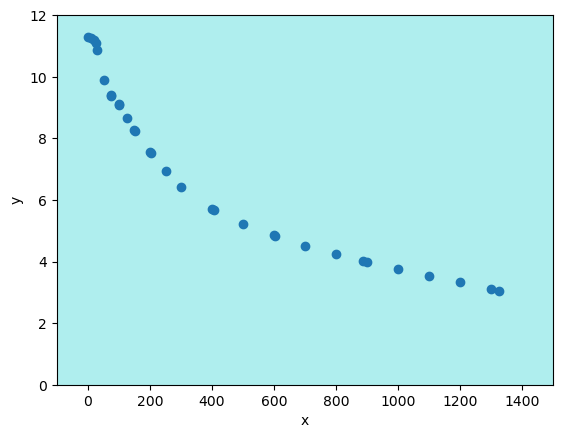

In [52]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_facecolor('paleturquoise')

ax.set_xlim([-100, 1500])
ax.set_ylim([0, 12])

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.scatter(x, y)

Нам необходимо аппроксимировать полученное множество точек прямой. Для этого, используя библиотеку numpy, решим систему линейных уравнений из которой найдем коэффициенты a и b уравнения прямой y = ax+b:

In [56]:
import numpy as np
def mnk(x, y):
    x1 = np.sum(np.multiply(x, x))
    x2 = np.sum(x)
    x3 = np.sum(np.multiply(x, y))
    y1 = x2
    y2 = len(x)
    y3 = np.sum(y)
    am = np.array([[x1, x2], [y1, y2]])
    bm = np.array([[x3],[y3]])
    l = np.linalg.solve(A, B)
    a = l[0,0]
    b = l[1,0]
    return(a, b)
a, b = mnk(x, y)

Изобразим график прямой с вычисленными выше коэффициентами:

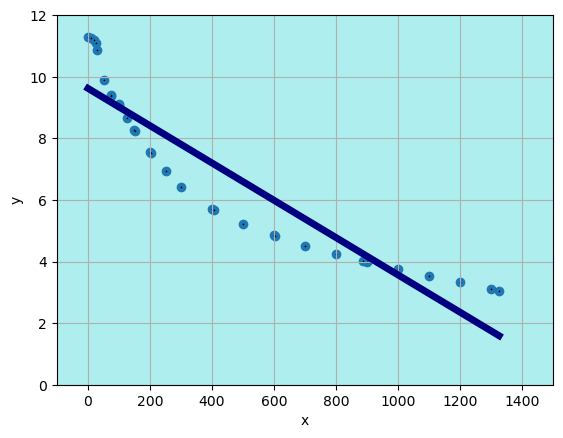

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_facecolor('paleturquoise')

ax.set_xlim([-100, 1500])
ax.set_ylim([0, 12])

ax.set_xlabel('x')
ax.set_ylabel('y')



z = np.arange(0, 1327, 1)
plt.scatter(x, y)
plt.plot(a*z+b)
plt.grid(True)

ax.plot(a*z+b, color = 'navy', linewidth = 5)
ax.scatter(x,y, color = 'black', marker = '1', linewidth = 1, s = 0.9)


# 2. Интерполяционный многочлен Лагранжа

Для выполнения этого задания также выгрузим данные из Exel-файла при помощи библиотеки pandas:

In [4]:
import pandas as pd
data = pd.read_excel('https://github.com/antonnpopov/2023/raw/main/210_1.xlsx', sheet_name = 'Lagrange')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(data.head(30))

    Salinity  Pres
0      233.0     0
1      232.5     8
2      232.8    10
3      234.1    19
4      234.0    20
5        NaN    30
6      233.0    39
7      231.0    50
8      228.5    58
9      220.1    75
10     218.6    78
11     211.2   101
12     204.5   118
13     198.2   126
14     178.3   151
15     176.7   153
16     173.6   201
17       NaN   222
18     166.8   252
19     158.9   287
20     155.7   302
21     139.6   376
22     135.4   403
23     122.4   504
24     114.0   603
25     113.9   605
26     107.8   706
27     101.5   807
28      95.4   904
